In [1]:
import cv2

# Load the image
image = cv2.imread('B.jpg')
save_path = r'C:\Users\PCCS\Desktop\ImageProcessing\PreProcessing\BSET\cropped_image.jpg'

# Define the coordinates of the top-left and bottom-right corners of the rectangle
# you want to crop. Format: (x, y)
# Example: Crop the region starting from (100, 50) to (400, 300)
top_left_corner = (200, 250)
bottom_right_corner = (100, 750)


# Crop the image using array slicing
cropped_image = image[top_left_corner[1]:bottom_right_corner[1], top_left_corner[0]:bottom_right_corner[1]]

# Display the original and cropped images
cv2.imshow('Original Image', image)
cv2.imshow('Cropped Image', cropped_image)
cv2.imwrite(save_path, cropped_image)

# Wait for a key press and then close all windows
cv2.waitKey(0)
cv2.destroyAllWindows()



In [2]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('cropped_image.jpg', cv2.IMREAD_GRAYSCALE)
save_path = r'C:\Users\PCCS\Desktop\ImageProcessing\PreProcessing\BSET\sharpened_image.jpg'

# Calculate the Laplacian
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Normalize the Laplacian image to display
# Convert to an unsigned 8-bit type
laplacian_display = cv2.convertScaleAbs(laplacian)

# Subtract the Laplacian from the original image to get the sharpened image
# Note: The convertScaleAbs function scales, calculates absolute values, and converts the result to 8-bit.
sharpened_image = cv2.convertScaleAbs(image - laplacian)

# Display the results
cv2.imshow('Original Image', image)
cv2.imshow('Laplacian Image', laplacian_display)
cv2.imshow('Sharpened Image', sharpened_image)
cv2.imwrite(save_path, sharpened_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [3]:
import cv2

# Load an image
image_path = 'sharpened_image.jpg'  # Replace this with the path to your image
save_path = r'C:\Users\PCCS\Desktop\ImageProcessing\PreProcessing\BSET\median_filtered_image.jpg'

image = cv2.imread(image_path)


# Apply a median filter
kernel_size = 3  # Size of the kernel window
median_filtered_image = cv2.medianBlur(image, kernel_size)

# Display the original and filtered images
cv2.imshow('Original Image', image)
cv2.imshow('Median Filtered Image', median_filtered_image)
cv2.imwrite(save_path, median_filtered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [4]:

import cv2
import numpy as np

def apply_min_max_filter(image, kernel_size=3):
    # Ensure kernel size is odd to have a central pixel
    assert kernel_size % 2 == 1, "Kernel size must be odd."
    
    # Calculate padding size needed
    pad_size = kernel_size // 2
    
    # Pad the image with edge values to handle borders
    padded_image = cv2.copyMakeBorder(image, pad_size, pad_size, pad_size,
                                              pad_size, cv2.BORDER_REPLICATE)
    
    # Prepare output images initialized with zeros
    min_filtered_image = np.zeros_like(image)
    
    # Get image dimensions
    height, width = image.shape
    
    # Nested loops to apply min and max filters
    for i in range(height):
        for j in range(width):
            # Extracting the 3x3 region around the current pixel
            region = padded_image[i:i + kernel_size, j:j + kernel_size]
            
            # Apply min and max filters
            min_filtered_image[i, j] = np.min(region)
    
    return min_filtered_image

# Load an image in grayscale
image_path = 'median_filtered_image.jpg'  # Replace this with the path to your image
save_path = r'C:\Users\PCCS\Desktop\ImageProcessing\PreProcessing\BSET\min_filtered.jpg'


image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply min and max filters
min_filtered = apply_min_max_filter(image, kernel_size=3)

# Display the original and filtered images
cv2.imshow('Original Image', image)
cv2.imshow('Min Filtered Image', min_filtered)
cv2.imwrite(save_path, min_filtered)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [7]:

import cv2
import numpy as np

# Load an image in grayscale
image_path = 'min_filtered.jpg'  # Replace this with the path to your image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
save_path = r'C:\Users\PCCS\Desktop\ImageProcessing\PreProcessing\BSET\eroded_image.jpg'

# Apply thresholding to ensure the image is binary
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Create a custom rectangular structuring element (5x5)
kernel = np.ones((5, 5), dtype=np.uint8)

# Apply the erosion operation
eroded_image = cv2.erode(binary_image, kernel, iterations=1)

# Display the original and eroded images
cv2.imshow('Original Image', binary_image)
cv2.imshow('Eroded Image with Custom Rectangular Element', eroded_image)
cv2.imwrite(save_path, eroded_image)

cv2.waitKey(0)
cv2.destroyAllWindows()



In [10]:
import cv2
import numpy as np

# Load image
image = cv2.imread('min_filtered.jpg', cv2.IMREAD_GRAYSCALE    )
save_path = r'C:\Users\PCCS\Desktop\ImageProcessing\PreProcessing\BSET\thresh1.jpg'

# Check if image is loaded properly
if image is None:
    print("Error: Image not found")
else:
    # Apply global thresholding
    ret, thresh1 = cv2.threshold(image, 120, 255, cv2.THRESH_BINARY)
 
    # Display images
    cv2.imshow('Original Image', image)
    cv2.imshow('Global Thresholding', thresh1)
    cv2.imwrite(save_path, thresh1)

    cv2.waitKey(0)
    cv2.destroyAllWindows()


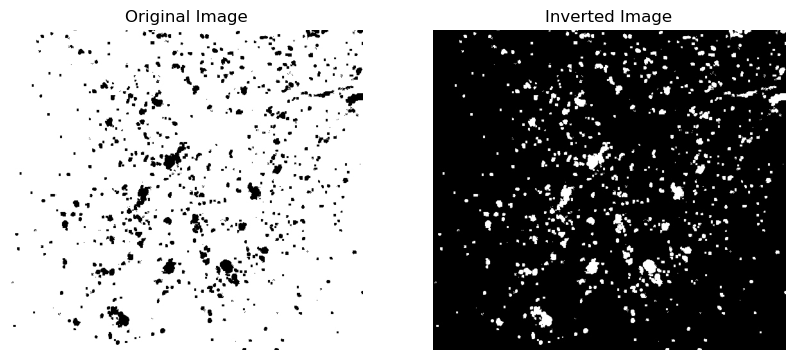

In [9]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = 'thresh1.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Invert the colors
inverted_image = cv2.bitwise_not(image)

# Save the modified image
output_path = r'C:\Users\PCCS\Desktop\ImageProcessing\PreProcessing\BSET\inverted_thresh1.jpg'
cv2.imwrite(output_path, inverted_image)

# Display the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Inverted Image")
plt.imshow(inverted_image, cmap='gray')
plt.axis('off')

plt.show()


In [14]:
import cv2
import numpy as np

# Function to generate a distinct color for each contour
def get_unique_color(index):
    # Generate a unique color using the HSV color space
    hue = int(255 * (index / len(contours)))  # Vary hue to get distinct colors
    color = cv2.cvtColor(np.uint8([[[hue, 255, 255]]]),
                                         cv2.COLOR_HSV2BGR)[0][0]
    return tuple(map(int, color))  # Convert color values to integers

# Load image
image = cv2.imread('inverted_thresh1.jpg', cv2.IMREAD_GRAYSCALE)
save_path = r'C:\Users\PCCS\Desktop\ImageProcessing\PreProcessing\BSET\contour_image.jpg'

# Check if image is loaded properly
if image is None:
    print("Error: Image not found")
else:
    # Apply thresholding to get a binary image
    ret, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, 
                                                cv2.CHAIN_APPROX_SIMPLE)

    # Create an empty image to draw and fill contours
    contour_image = np.zeros((image.shape[0], image.shape[1], 3), 
                                                     dtype=np.uint8)

    # Loop through the contours
    for i, contour in enumerate(contours):
        # Calculate the area of each contour
        area = cv2.contourArea(contour)

        # Get a unique color for each contour
        color = get_unique_color(i)

        # Fill each contour with a unique color
        cv2.drawContours(contour_image, [contour], -1, color, 
                                              thickness=cv2.FILLED)

        # Find the position for labeling the contour index
        M = cv2.moments(contour)
        if M['m00'] != 0:
            cx = int(M['m10']/M['m00'])
            cy = int(M['m01']/M['m00'])
        else:
            cx, cy = 0, 0

        # Put index number on each contour
        cv2.putText(contour_image, str(i + 1), (cx, cy), 
                                      cv2.FONT_HERSHEY_SIMPLEX, 
                                               0.5, (255, 255, 255), 2)

        # Print the contour number and the area of each contour
        print(f"Contour #{i + 1}: Area = {area}")

    # Display the original image and the contour image
    cv2.imshow('Original Image', image)
    cv2.imshow('Contours with Filling and Labeling', contour_image)
    cv2.imwrite(save_path, contour_image)

    cv2.waitKey(0)
    cv2.destroyAllWindows()

Contour #1: Area = 10.0
Contour #2: Area = 9.5
Contour #3: Area = 0.0
Contour #4: Area = 6.0
Contour #5: Area = 9.5
Contour #6: Area = 30.5
Contour #7: Area = 12.5
Contour #8: Area = 9.0
Contour #9: Area = 4.0
Contour #10: Area = 1.0
Contour #11: Area = 11.5
Contour #12: Area = 16.5
Contour #13: Area = 40.5
Contour #14: Area = 4.0
Contour #15: Area = 8.5
Contour #16: Area = 0.0
Contour #17: Area = 40.5
Contour #18: Area = 5.5
Contour #19: Area = 18.5
Contour #20: Area = 6.0
Contour #21: Area = 0.0
Contour #22: Area = 14.0
Contour #23: Area = 10.0
Contour #24: Area = 0.0
Contour #25: Area = 35.0
Contour #26: Area = 0.0
Contour #27: Area = 79.5
Contour #28: Area = 3.5
Contour #29: Area = 25.0
Contour #30: Area = 1.0
Contour #31: Area = 0.0
Contour #32: Area = 10.5
Contour #33: Area = 0.0
Contour #34: Area = 8.5
Contour #35: Area = 0.0
Contour #36: Area = 0.0
Contour #37: Area = 4.0
Contour #38: Area = 44.0
Contour #39: Area = 4.0
Contour #40: Area = 0.0
Contour #41: Area = 24.0
Contour #

#### 